In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [20]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


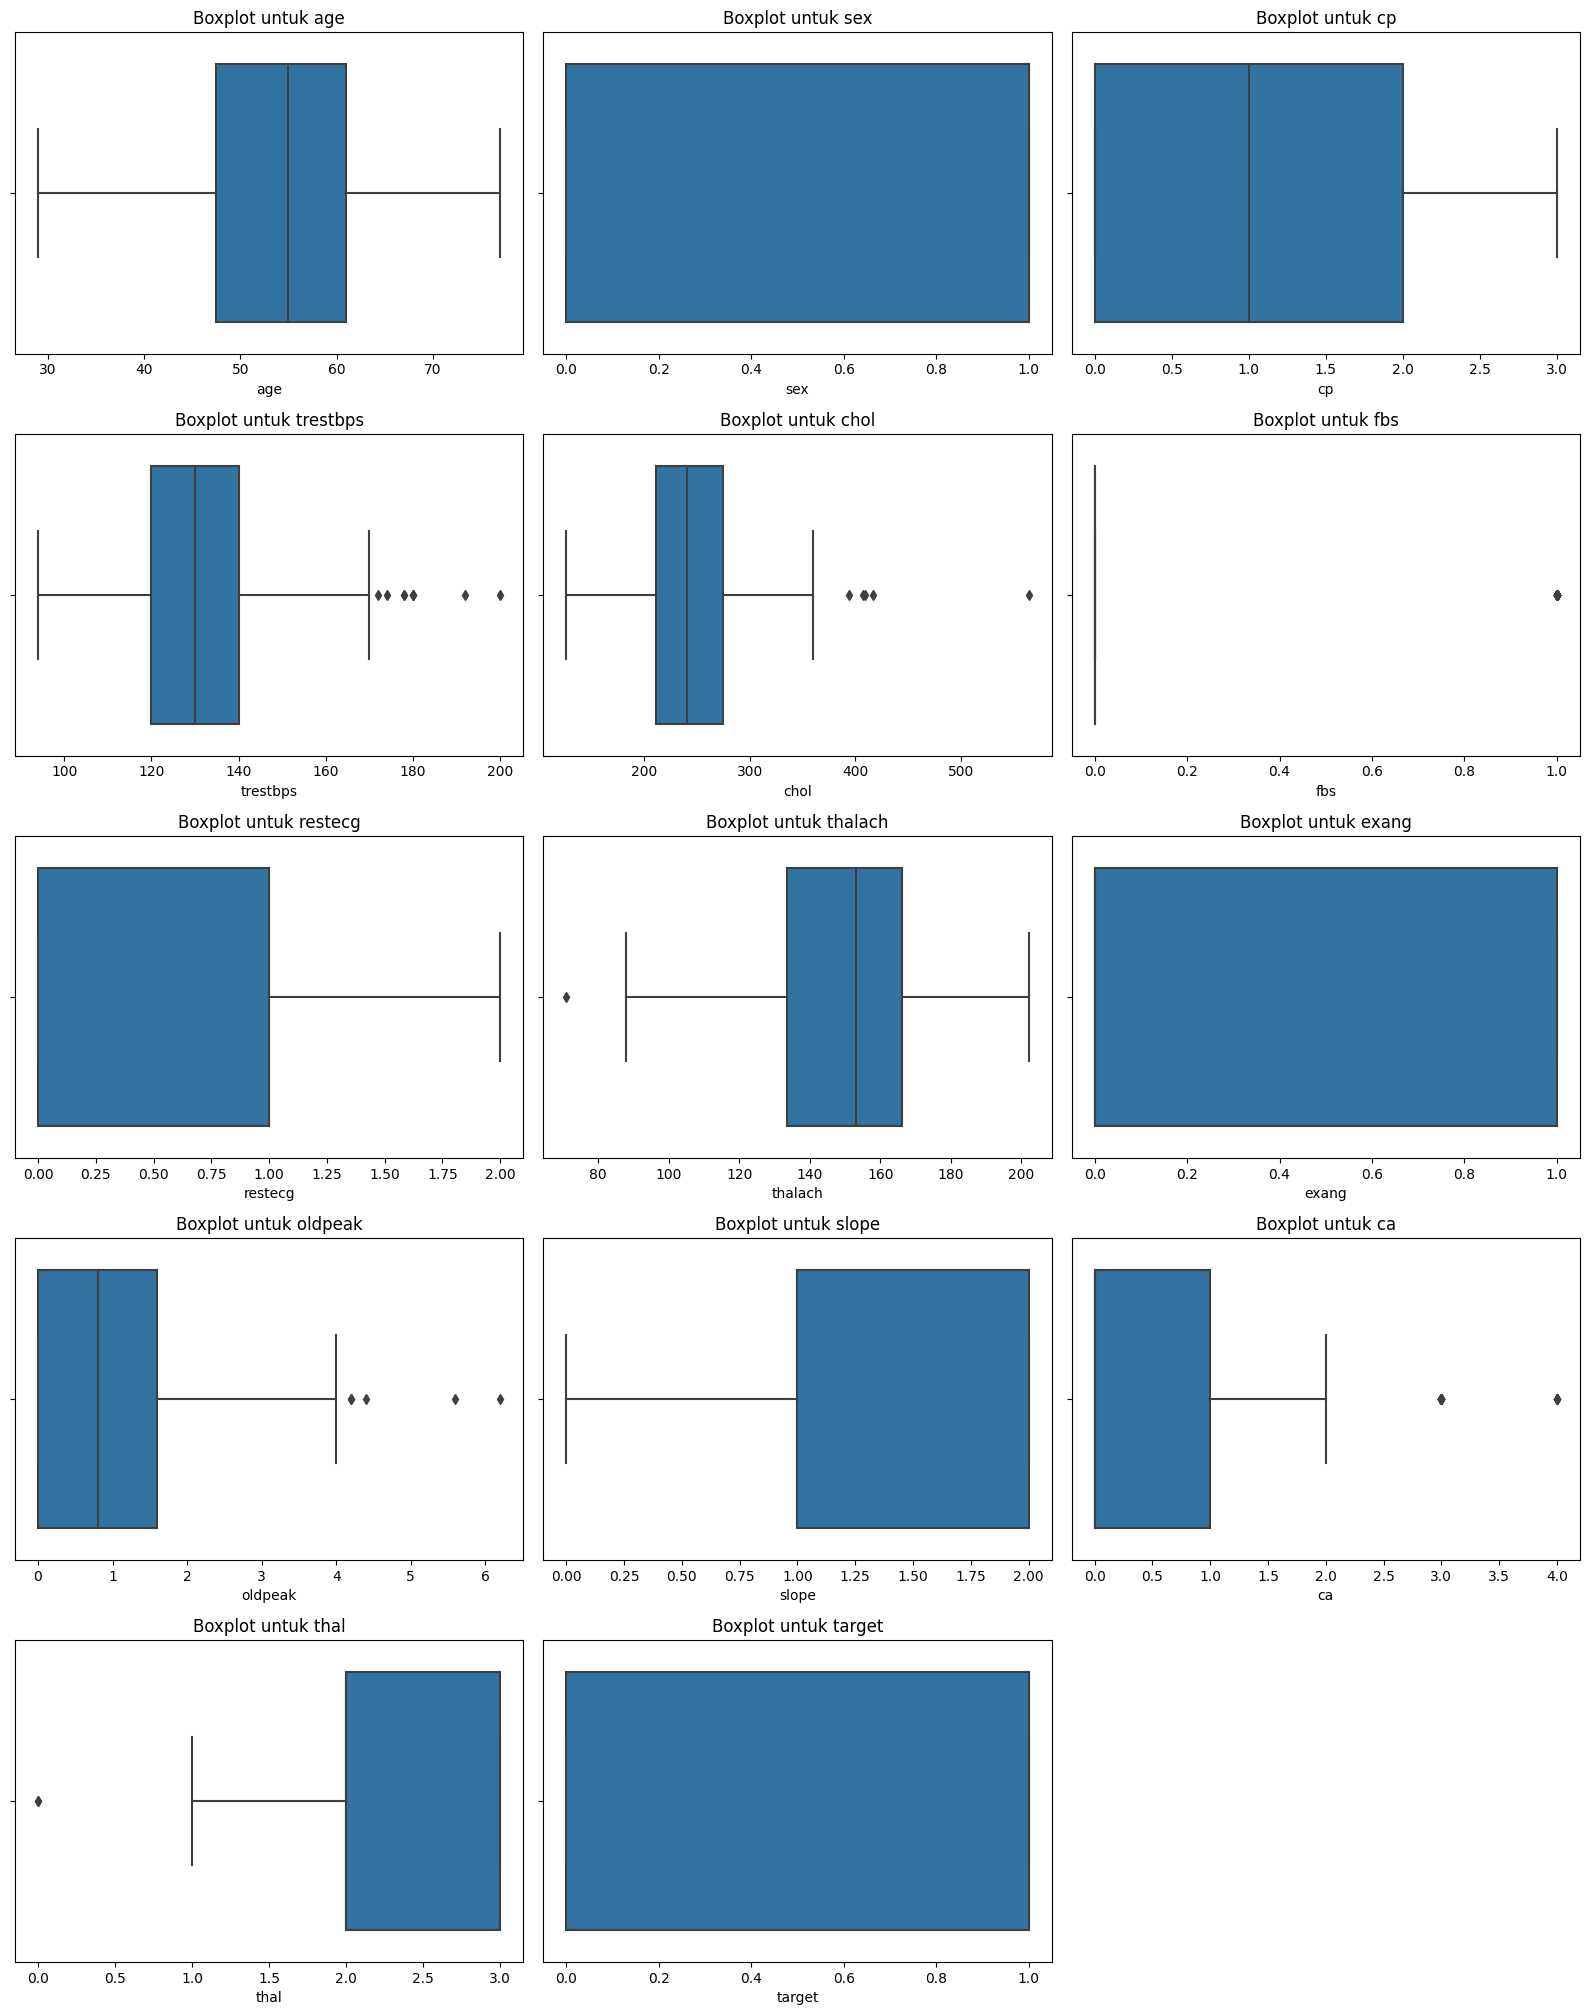

In [21]:
data_num = df.select_dtypes(include='number')

# Menampilkan boxplot untuk setiap fitur numerik
num_cols = data_num.shape[1]
plt.figure(figsize=(16, 4 * num_cols))

for i, col in enumerate(data_num.columns):
    plt.subplot(num_cols, 3, i+1)
    sns.boxplot(x=data_num[col])
    plt.title(f"Boxplot untuk {col}")

plt.tight_layout()
#plt.savefig('contoh_plot2.png')
plt.show()

In [22]:
df2 = df.copy()

for i in df2.columns:
    if df2[i].nunique() >= 12:
        Q1 = df2[i].quantile(0.25)
        Q3 = df2[i].quantile(0.75)
        IQR = Q3 - Q1
        df2 = df2[(df2[i] >= (Q1 - 1.5 * IQR)) & (df2[i] <= (Q3 + 1.5 * IQR))]

df2 = df2.reset_index(drop=True)

print('Dataset sebelum dilakukan drop outlier memiliki {} record.'.format(df.shape[0]))
print('Dataset setelah dilakukan drop outlier memiliki {} record.'.format(df2.shape[0]))
print("\n Jumlah Kelas", df2["target"].value_counts())

Dataset sebelum dilakukan drop outlier memiliki 303 record.
Dataset setelah dilakukan drop outlier memiliki 284 record.

 Jumlah Kelas target
1    159
0    125
Name: count, dtype: int64


<Axes: title={'center': 'PENYEBARAN DATA MENTAH'}, ylabel='count'>

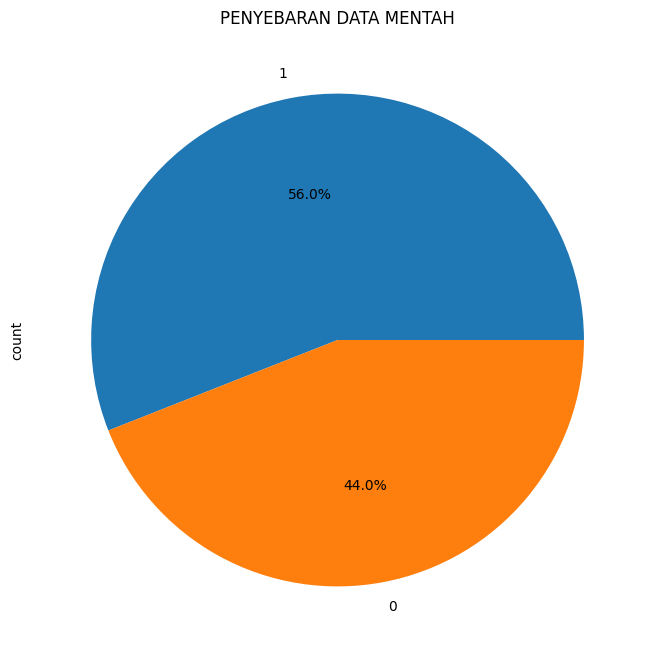

In [23]:
plt.title('PENYEBARAN DATA MENTAH')
df2['target'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8),shadow=None)

In [24]:
df3 = df2.copy()

print('Penyebaran kelas data raw:')
print(df3["target"].value_counts())

xf = df3.columns
X = df3.drop(["target"],axis=1)
Y = df3["target"]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df3 = pd.DataFrame(X, columns=xf)
df3["target"] = Y

print('\nPenyebaran kelas data setelah dilakukan SMOTE:',)
print(Y.value_counts())

Penyebaran kelas data raw:
target
1    159
0    125
Name: count, dtype: int64

Penyebaran kelas data setelah dilakukan SMOTE:
target
1    159
0    159
Name: count, dtype: int64


<Axes: title={'center': 'PENYEBARAN DATA SETELAH SMOTE'}, ylabel='count'>

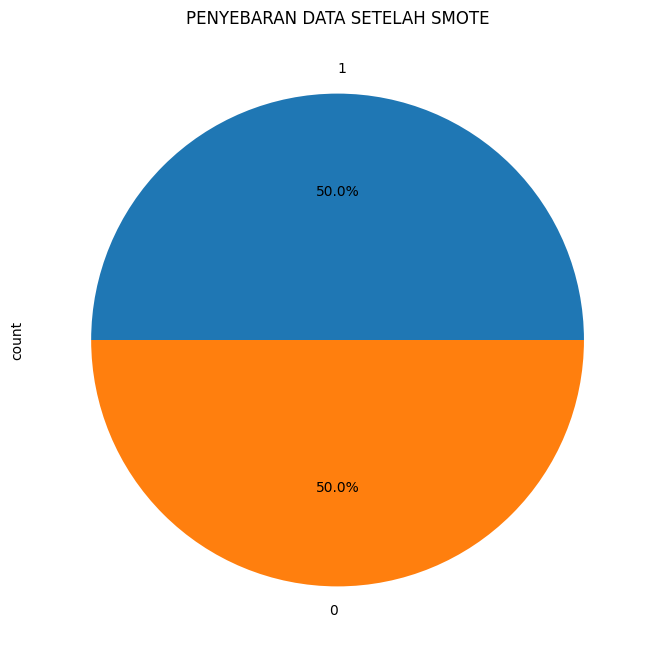

In [25]:
plt.title('PENYEBARAN DATA SETELAH SMOTE')
df3['target'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8),shadow=None)

In [26]:
df3.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df = df3.copy()
np.random.seed(42)

mi = mutual_info_classif(df.iloc[:, :-1], df.iloc[:, -1])
redundancy = np.zeros(mi.shape)
for i in range(mi.shape[0]):
    for j in range(mi.shape[0]):
        if i != j:
            redundancy[i] += mi[i] * mi[j] / mi.sum()

mrmr = mi - redundancy

hapus = np.argsort(mrmr)[:3]
df.drop(df.columns[hapus], axis=1, inplace=True)

print("Selected Features:", df.columns)

Selected Features: Index(['age', 'cp', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal', 'target'],
      dtype='object')


In [28]:
df.head()

,age,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,233,0,150,0,2.3,0,0,1,1
1,37,2,250,1,187,0,3.5,0,0,2,1
2,41,1,204,0,172,0,1.4,2,0,2,1
3,56,1,236,1,178,0,0.8,2,0,2,1
4,57,0,354,1,163,1,0.6,2,0,2,1


In [29]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['target'] = df3['target']
df = df_scaled

df.head()

,age,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.000000,0.457265,0.0,0.543860,0.0,0.575,0.0,0.0,0.333333,1
1,0.166667,0.666667,0.529915,0.5,0.868421,0.0,0.875,0.0,0.0,0.666667,1
2,0.250000,0.333333,0.333333,0.0,0.736842,0.0,0.350,1.0,0.0,0.666667,1
3,0.562500,0.333333,0.470085,0.5,0.789474,0.0,0.200,1.0,0.0,0.666667,1
4,0.583333,0.000000,0.974359,0.5,0.657895,1.0,0.150,1.0,0.0,0.666667,1


In [30]:
df.shape

(318, 11)

In [31]:
y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Memastikan bahwa data train 80% dan data test 20%
print(f"'X' shape:{X_train.shape}")
print(f"'y' shape:{X_test.shape}")

'X' shape:(254, 10)
'y' shape:(64, 10)


In [32]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

Y_pred = clf_nb.predict(X_test)

clf_nb_acc = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {clf_nb_acc}')

Accuracy: 0.78125


              precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.77      0.82      0.79        33

    accuracy                           0.78        64
   macro avg       0.78      0.78      0.78        64
weighted avg       0.78      0.78      0.78        64



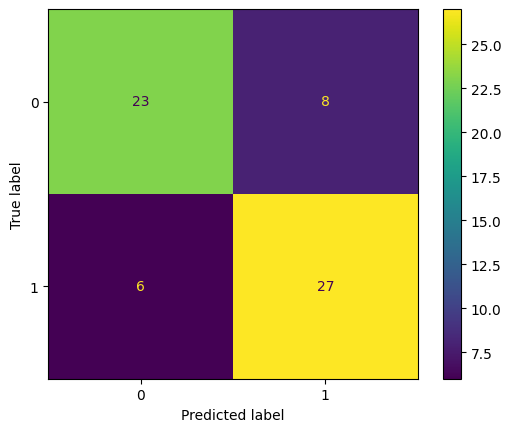

In [33]:
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#plt.savefig('confusionMatrix.png')
plt.show()